<a href="https://colab.research.google.com/github/verondel/data_analysis/blob/main/hw_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание 4: Факторный анализ

## libs

In [ ]:
!pip install factor_analyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.5/42.5 kB 2.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.7/203.7 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.9/98.9 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.9/468.9 kB 11.2 MB/s eta 0:00:00
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.0-py2.py3-none-any.whl size=42486 sha256=9436e383d27a7f953dd2ddc886743c2b46d3ee7b44d01e453e3878633424e765
  Stored in directory: /root/.cache/pip/wheels/74/a2/6c/26fb1addf1ce6c60a8cef8397f2999f0a1e6e2fcddc8abf33e
Successfully built factor_analyzer


In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn import preprocessing
from sklearn.decomposition import PCA
from factor_analyzer import FactorAnalyzer
from factor_analyzer import factor_analyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
import matplotlib.pyplot as plt

## dataset info


- `age` - Age of the patient
- `sex` - Sex of the patient
- `cp` - Chest pain type
    - ~ 0 = Typical Angina,
    - 1 = Atypical Angina,
    - 2 = Non-anginal Pain,
    - 3 = Asymptomatic
- `trtbps` - Resting blood pressure (in mm Hg)
- `chol` - Cholestoral in mg/dl fetched via BMI sensor
- `fbs` - (fasting blood sugar > 120 mg/dl) ~ 1 = True, 0 = False
- `restecg` - Resting electrocardiographic results
  - ~ 0 = Normal,
  - 1 = ST-T wave normality,
  - 2 = Left ventricular hypertrophy
- `thalachh` - Maximum heart rate achieved
- `oldpeak` - Previous peak
- `slp` - Slope
- `caa` - Number of major vessels
- `thall` - Thalium Stress Test result ~ (0,3)
- `exng` - Exercise induced angina ~ 1 = Yes, 0 = No
- `output` - Target variable

## 1-4 chdir

In [ ]:
os.chdir("/content/drive/MyDrive/sem5_python/data")
filename = "heart.csv"
df = pd.read_csv(filename)
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df = df.drop("output", axis=1)

In [ ]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


Вывод:
* Средний возраст пациентов составляет около 54.4 лет, с минимальным возрастом в 29 лет и максимальным возрастом в 77 лет.
* Уровень холестерина (поле "chol") варьируется от 126 до 564, с средним значением около 246.
* Показатель "thalachh" (максимальная достигнутая частота сердечных сокращений) имеет среднее значение около 150.

## 5. corr

In [ ]:
df.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244


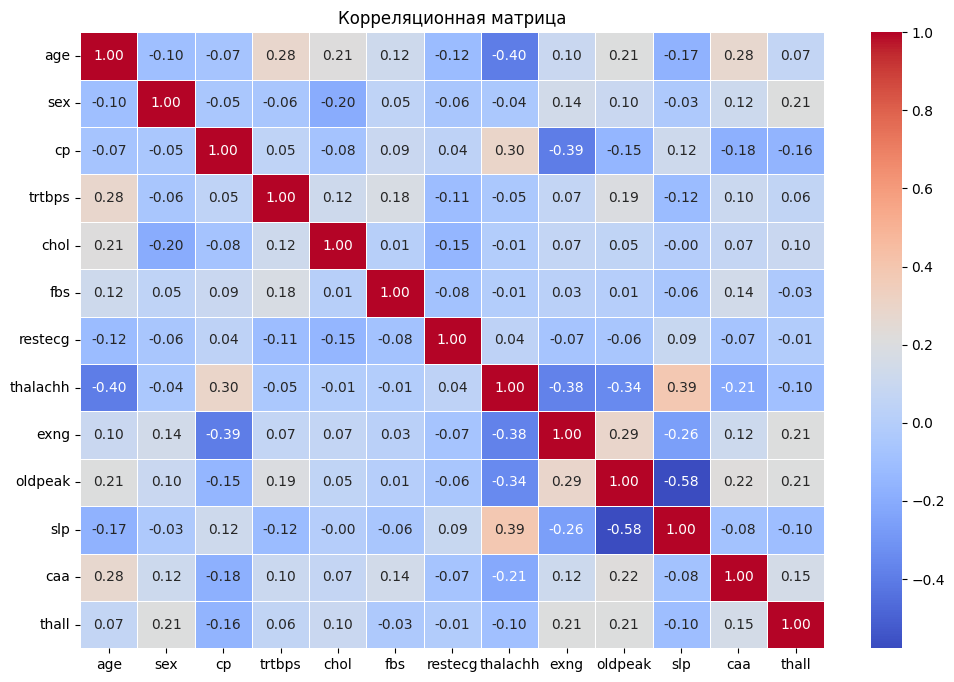

In [ ]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Корреляционная матрица")
plt.show()

Вывод:
* Наиболее высокая положительная корреляция (0.39) наблюдается между признаками "thalachh" (максимальная достигнутая частота сердечных сокращений) и "slp" (наклон пика уровня ST сегмента), что может означать, что более высокая частота сердечных сокращений может быть связана с определенными изменениями в наклоне ST сегмента.

* Наиболее высокая отрицательная корреляция (0.58) наблюдается между признаками "oldpeak" (изменение ST-сегмента, вызванное физической нагрузкой по данным ЭКГ) и "slp" (наклон пика уровня ST сегмента).

## 6. scatter_matrix()

array([[<Axes: xlabel='age', ylabel='age'>,
        <Axes: xlabel='sex', ylabel='age'>,
        <Axes: xlabel='cp', ylabel='age'>,
        <Axes: xlabel='trtbps', ylabel='age'>,
        <Axes: xlabel='chol', ylabel='age'>,
        <Axes: xlabel='fbs', ylabel='age'>,
        <Axes: xlabel='restecg', ylabel='age'>,
        <Axes: xlabel='thalachh', ylabel='age'>,
        <Axes: xlabel='exng', ylabel='age'>,
        <Axes: xlabel='oldpeak', ylabel='age'>,
        <Axes: xlabel='slp', ylabel='age'>,
        <Axes: xlabel='caa', ylabel='age'>,
        <Axes: xlabel='thall', ylabel='age'>],
       [<Axes: xlabel='age', ylabel='sex'>,
        <Axes: xlabel='sex', ylabel='sex'>,
        <Axes: xlabel='cp', ylabel='sex'>,
        <Axes: xlabel='trtbps', ylabel='sex'>,
        <Axes: xlabel='chol', ylabel='sex'>,
        <Axes: xlabel='fbs', ylabel='sex'>,
        <Axes: xlabel='restecg', ylabel='sex'>,
        <Axes: xlabel='thalachh', ylabel='sex'>,
        <Axes: xlabel='exng', ylabel='sex'>,

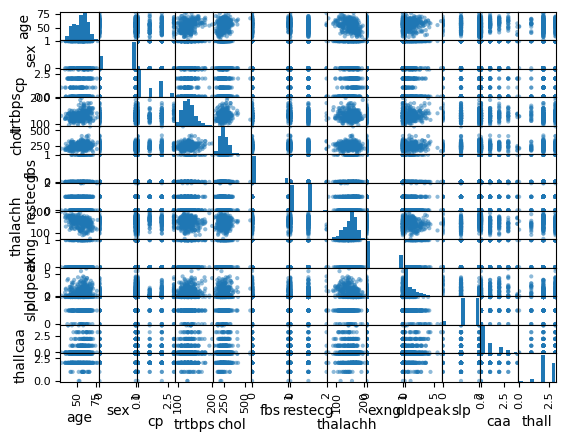

In [ ]:
scatter_matrix(df)

## 7. Критерий сферичности Бартлетта

In [ ]:
bartlett_test_statistic, bartlett_p_value = calculate_bartlett_sphericity(df)
print(f'Bartlett Test Statistic: {bartlett_test_statistic}')
print(f'P-value: {bartlett_p_value}')

Bartlett Test Statistic: 559.7821221803955
P-value: 5.956747005601754e-74


Вывод: Нулевая гипотеза о равенстве дисперсий между группами отвергается (p-value < 0.05). Между группами существуют статистически значимые различия в дисперсиях

## 8. Мера адекватности выборки Кайзера-Мейера-Олкина

In [ ]:
kmo_all, kmo_model = calculate_kmo(df)
print(f'KMO для каждой переменной:\n{kmo_all}')
print(f'KMO для всей модели: {kmo_model}')

KMO для каждой переменной:
[0.6364023  0.51627039 0.68661961 0.64949471 0.54057689 0.52544022
 0.63244853 0.70504862 0.73243656 0.68917282 0.65648555 0.69919196
 0.70163682]
KMO для всей модели: 0.6669495236713648


**Вывод**: Общий KMO для модели составляет 0.667, поэтому данные в целом подходят для проведения факторного анализа.  

## 9.	Стандартизировать переменные

In [ ]:
data_scaled = preprocessing.scale(df)

## 10-14 PCA()

In [ ]:
pca = PCA(n_components=df.shape[1])

In [ ]:
pca.fit(data_scaled)

PCA(n_components=13)

In [ ]:
pca.explained_variance_

array([2.772176  , 1.54178039, 1.22688342, 1.18505659, 1.02535054,
       0.97322784, 0.86562678, 0.77851473, 0.72130605, 0.62362837,
       0.53186008, 0.42454351, 0.37309206])

**Вывод:** значение больше единицы 5 компонент. Первая компонента содержит наибольшее количество информации и объясняет наибольшую часть дисперсии в данных. Постепенно убывающие значения объясненной дисперсии для остальных компонент показывают, что каждая следующая компонента объясняет меньшую часть дисперсии.


In [ ]:
pca.explained_variance_ratio_

array([0.21254053, 0.11820708, 0.09406418, 0.09085735, 0.07861281,
       0.07461661, 0.06636692, 0.05968811, 0.05530196, 0.04781309,
       0.04077729, 0.03254941, 0.02860467])

**Вывод:** Первая компонента имеет наибольшую долю дисперсии в данных (примерно 21.25%). Вторая компонента имеет вторую по величине долю дисперсии (примерно 11.82%).

## 15-18 FactorAnalyzer()

In [ ]:
factor_analyzer = FactorAnalyzer(n_factors=3)

In [ ]:
factor_analyzer.fit(data_scaled)

FactorAnalyzer(rotation_kwargs={})

In [ ]:
eigen_values, eigen_vectors = factor_analyzer.get_eigenvalues()
print(f'Собственные числа: {eigen_values}')

Собственные числа: [2.76302691 1.536692   1.2228343  1.18114551 1.02196654 0.97001587
 0.86276993 0.77594538 0.7189255  0.62157019 0.53010476 0.42314238
 0.37186073]


In [ ]:
num_factors_kaiser = np.sum(eigen_values > 1)
print(f'Число факторов согласно правилу Кайзера: {num_factors_kaiser}')

Число факторов согласно правилу Кайзера: 5


**Вывод**: Необходимо выбрать 5 факторов: `age`, `sex`,`cp`,`trtbps`, `chol`, `fbs`

##  19. Метод Кеттелла

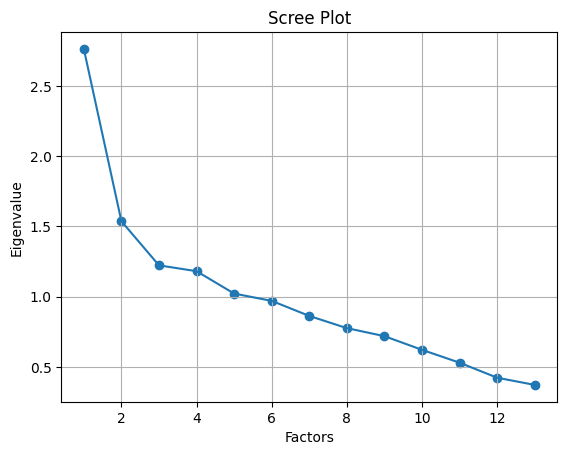

In [ ]:
plt.scatter(range(1,data_scaled.shape[1]+1), eigen_values)
plt.plot(range(1,data_scaled.shape[1]+1),eigen_values)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

**Вывод**: Выберем 3 фактора, поскольку при значениях менее 3 график снижается быстро, а после достижения значения 3 происходит существенное замедление темпа снижения

## 20-21 Матрица факторных нагрузок

In [ ]:
n_factors = 3
factor_analyzer.set_params(n_factors=n_factors, rotation='varimax')
factor_analyzer.fit(data_scaled)

FactorAnalyzer(rotation='varimax', rotation_kwargs={})

In [ ]:
factor_loadings = pd.DataFrame(factor_analyzer.loadings_,
                               columns=['Factor 1', 'Factor 2', 'Factor 3'],
                               index=df.columns)
factor_loadings

,Factor 1,Factor 2,Factor 3
age,0.146870,0.095181,0.751375
sex,0.185396,0.101627,-0.165571
cp,-0.651260,0.031635,-0.000201
trtbps,-0.054950,0.161015,0.383790
chol,0.065617,-0.067495,0.312595
fbs,-0.078748,0.064445,0.210252
restecg,-0.055705,-0.049193,-0.186727
thalachh,-0.465164,-0.307360,-0.270387
exng,0.590691,0.202028,0.038425
oldpeak,0.269563,0.684648,0.164433


**Вывод:**
* "Factor 1" имеет сильную положительную связь с переменной `exng` , а также отрицательную связь с `cp` и `thalachh`.
* "Factor 2" имеет сильную положительную связь с переменной `oldpeak`, а также отрицательную связь с `slp`.
* "Factor 3" имеет сильную положительную связь с переменной `age`.

## 22 Факторный анализ с другим количеством факторов

In [ ]:
n_factors = 7
factor_analyzer.set_params(n_factors=n_factors, rotation='varimax')
factor_analyzer.fit(data_scaled)

FactorAnalyzer(n_factors=7, rotation='varimax', rotation_kwargs={})

In [ ]:
factor_loadings = pd.DataFrame(factor_analyzer.loadings_,
                               columns=['Factor 1', 'Factor 2',  'Factor 3', 'Factor 4', 'Factor 5', 'Factor 6', 'Factor 7'],
                               index=df.columns)
factor_loadings

,Factor 1,Factor 2,Factor 3,Factor 4,Factor 5,Factor 6,Factor 7
age,0.125364,-0.401640,-0.057078,-0.015960,0.167588,0.419138,0.230166
sex,0.022561,0.003660,0.979392,0.085837,0.042030,-0.157757,0.064466
cp,-0.051467,0.122910,-0.023786,-0.527512,-0.119961,-0.082624,0.167065
trtbps,0.162579,-0.034854,-0.028371,-0.039834,0.017110,0.299318,0.371946
chol,-0.012217,0.013962,-0.118155,0.080783,0.026990,0.526539,-0.010945
fbs,0.000130,-0.017546,0.018194,-0.042374,0.068043,0.020039,0.463276
restecg,-0.031223,0.023501,-0.062968,-0.056584,-0.007246,-0.216173,-0.157216
thalachh,-0.247431,0.911603,-0.011010,-0.314110,-0.067749,0.009171,0.006404
exng,0.184587,-0.115145,0.078556,0.730336,-0.026070,0.048607,0.114976
oldpeak,0.971687,-0.063504,0.075852,0.125296,0.119091,0.112868,0.001137


**Вывод**: Выбор 7 факторов в модели избыточно

## 23 Общность

In [ ]:
communalities = factor_analyzer.get_communalities()
print(f'Communalities: {communalities}')

Communalities: [0.43728211 0.99790936 0.34571818 0.25826581 0.2989226  0.22209085
 0.08019389 0.99574297 0.60315417 0.99658348 0.39994458 0.99532863
 0.16300699]


**Вывод:**
* `age`, `cp`, `trtbps`, `chol`, `fbs`, `restecg`, `slp`, и `caa` имеют относительно низкие значения коммунальности, что может указывать на то, что часть их вариации остается неразъясненной факторами, полученными в анализе.

* sex`, `thalachh`, `exng`, `oldpeak`, и `thall` имеют высокие значения коммунальности, близкие к 1. Это означает, что большая часть вариации в этих переменных объясняется факторами, и они хорошо согласуются с моделью.

## 24 Уникальность

In [ ]:
uniquenesses = factor_analyzer.get_uniquenesses()
print(f'Uniquenesses: {uniquenesses}')

Uniquenesses: [0.56271789 0.00209064 0.65428182 0.74173419 0.7010774  0.77790915
 0.91980611 0.00425703 0.39684583 0.00341652 0.60005542 0.00467137
 0.83699301]


**Вывод**:
* Переменные `age`, `cp`, `trtbps`, `chol`, `fbs`, `restecg`, `slp`, и `caa` имеют высокие значения уникальности, близкие к 1. Это указывает на то, что большая часть вариации в этих переменных остается неразъясненной факторами, и они сохраняют свою уникальность.

* Переменные `sex`, `thalachh`, `exng`, `oldpeak`, и `thall` имеют низкие значения уникальности, близкие к 0. Это означает, что они хорошо объясняются факторами, и уникальная вариация в этих переменных невелика.

Например, переменная `thalachh` имеет уникальность близкую к 0 (0.00425703), что указывает на то, что почти вся вариация в этой переменной объясняется факторами.

## 25. Таблица с информацией

In [ ]:
factor_variance = factor_analyzer.get_factor_variance()
factor_variance_df = pd.DataFrame(factor_variance, columns=['age', 'sex',  'cp', 'trtbps', 'chol', 'fbs', 'restecg'],
                                  index=['SS Loadings', 'Proportion Var', 'Cumulative Var'])
factor_variance_df

,age,sex,cp,trtbps,chol,fbs,restecg
SS Loadings,1.422894,1.082978,1.046028,1.038854,1.008436,0.676706,0.518247
Proportion Var,0.109453,0.083306,0.080464,0.079912,0.077572,0.052054,0.039865
Cumulative Var,0.109453,0.192759,0.273223,0.353135,0.430707,0.482761,0.522626


**Вывод**:
* `age` объясняет примерно 10.95% общей дисперсии в данных, и ее сумма квадратов загрузок (SS Loadings) составляет примерно 1.42
* `sex` объясняет примерно 8.33% дисперсии, и ее SS Loadings равен примерно 1.08
* `cp` объясняет примерно 8.05% дисперсии, и ее SS Loadings равен примерно 1.05

## 26 Значения факторов на основе стандартизированных данных

In [ ]:
factor_scores = factor_analyzer.fit_transform(data_scaled)
factor_scores_df = pd.DataFrame(factor_scores,
                                columns=['f1', 'f2',  'f3', 'f4', 'f5', 'f6', 'f7'])
factor_scores_df.head()

,f1,f2,f3,f4,f5,f6,f7
0,1.359677,-0.153304,0.692918,-1.399122,-1.004130,-0.120967,1.799835
1,2.483985,2.148860,0.682192,-0.860014,-0.534150,-0.603754,-0.296540
2,0.682439,1.040950,-1.522243,-0.436528,-0.391711,-0.394633,-0.605688
3,-0.073086,1.085566,0.799660,-0.635716,-0.527807,-0.003622,-0.412383
4,-0.429910,0.856222,-1.349124,1.158324,-0.671062,0.993883,-0.499348


## 27. Оцените корреляцию между факторами

In [ ]:
factor_scores_df.corr()

,f1,f2,f3,f4,f5,f6,f7
f1,1.000000,0.004370,0.007109,0.039297,-0.005623,0.094379,-0.036765
f2,0.004370,1.000000,0.015171,-0.148485,0.006127,0.045842,-0.001506
f3,0.007109,0.015171,1.000000,0.045730,0.000222,-0.145308,0.085054
f4,0.039297,-0.148485,0.045730,1.000000,0.038794,0.040323,-0.027750
f5,-0.005623,0.006127,0.000222,0.038794,1.000000,0.057127,0.133633
f6,0.094379,0.045842,-0.145308,0.040323,0.057127,1.000000,0.217160
f7,-0.036765,-0.001506,0.085054,-0.027750,0.133633,0.217160,1.000000


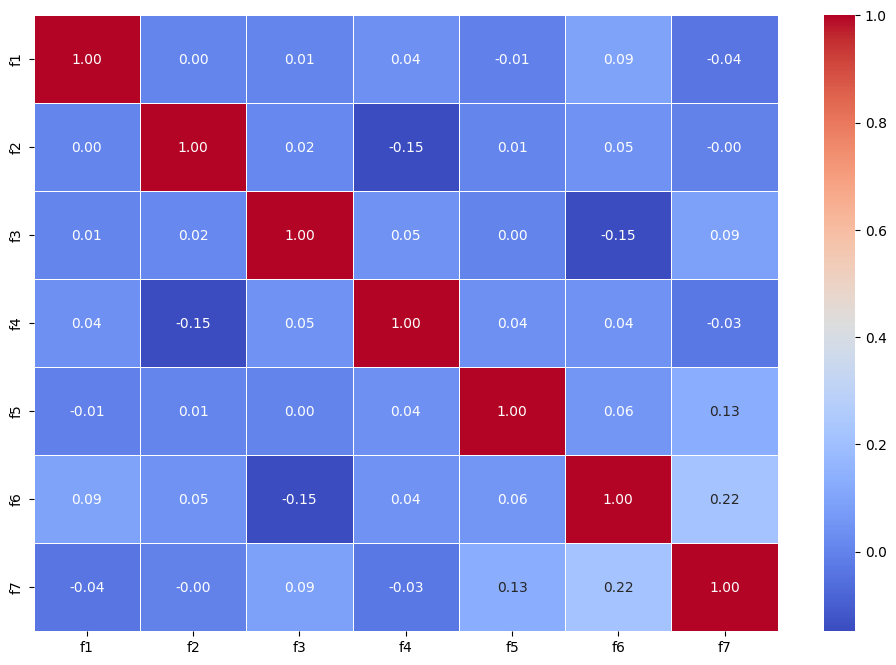

In [ ]:
corr_matrix = factor_scores_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.show()

**Вывод:** Корреляционная матрица не показывает сильных корреляций между факторами, что благоприятно влияет на возможность применения этих факторов в регрессионном анализе.